<a href="https://colab.research.google.com/github/AlaaSamirSayed/Deep-Learning-projects/blob/main/Image_denoising_with_outo_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D,Input,Dropout,add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [5]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

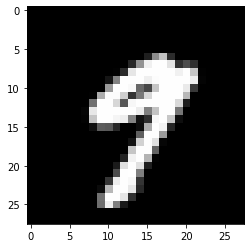

In [7]:
# randomly select input image
index = 20
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

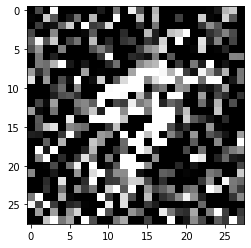

In [8]:
# randomly select input image
index = 20
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()


In [ ]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 64)   640         ['input_3[0][0]']                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 28, 28, 64)   36928       ['conv2d_20[0][0]']              
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 14, 14, 64)  0           ['conv2d_21[0][0]']              
                                                                                            

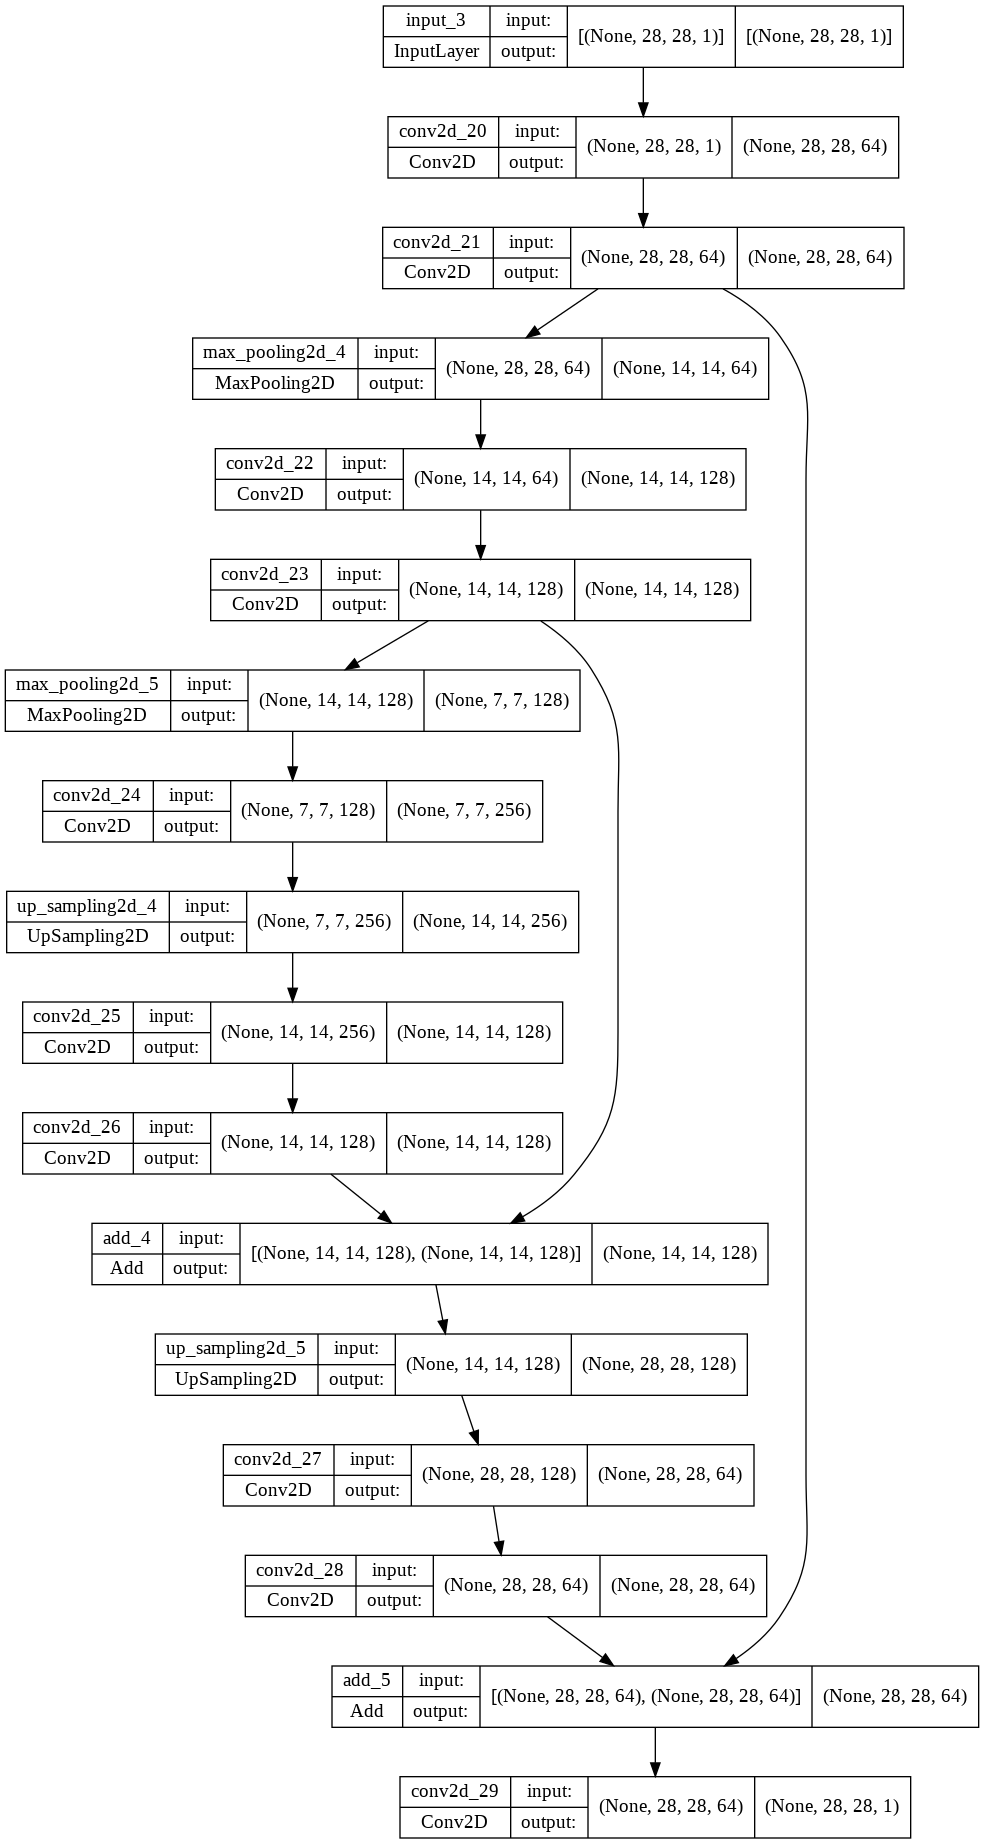

In [48]:
input_img=Input(shape=(28,28,1))
l1=Conv2D (64,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(input_img)
l2=Conv2D (64,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l1)
l3=MaxPooling2D(padding='same')(l2)
l4=Conv2D (128,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l3)
l5=Conv2D (128,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l4)
l6=MaxPooling2D(padding='same')(l5)

l7=Conv2D (256,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l6)

l8=UpSampling2D()(l7)
l9=Conv2D (128,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l8)
l10=Conv2D (128,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l9)
l11=add([l10,l5])
l12=UpSampling2D()(l11)
l13=Conv2D (64,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l12)
l14=Conv2D (64,(3,3) , padding='same' ,activation='relu',activity_regularizer=regularizers.l1(10e-10))(l13)
l15=add([l14,l2])

decoder=Conv2D (1,(3,3) , padding='same' ,activation='sigmoid',activity_regularizer=regularizers.l1(10e-10))(l15)
#out= tf.keras.filters
autoencoder=Model(input_img,decoder)
autoencoder.summary()
plot_model(autoencoder, to_file ='encoder.png',show_shapes=True)

In [49]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# train the model
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3, verbose=1, mode='min')

autoencoder.fit(x_train_noisy, x_train, epochs=300, batch_size=128, validation_data=(x_test_noisy, x_test),callbacks=[early_stopper])

Epoch 1/300
469/469 [==============================] - 32s 65ms/step - loss: 0.1301 - accuracy: 0.8093 - val_loss: 0.1071 - val_accuracy: 0.8114
Epoch 2/300
469/469 [==============================] - 31s 65ms/step - loss: 0.1056 - accuracy: 0.8121 - val_loss: 0.1035 - val_accuracy: 0.8118
Epoch 3/300
469/469 [==============================] - 30s 65ms/step - loss: 0.1023 - accuracy: 0.8126 - val_loss: 0.1007 - val_accuracy: 0.8120
Epoch 4/300
469/469 [==============================] - 30s 64ms/step - loss: 0.1004 - accuracy: 0.8128 - val_loss: 0.0994 - val_accuracy: 0.8120
Epoch 4: early stopping


In [51]:
results=autoencoder.predict(x_test_noisy)

(-0.5, 27.5, 27.5, -0.5)

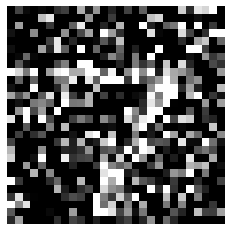

In [53]:
plt.imshow(x_test_noisy[0].reshape(28,28))
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

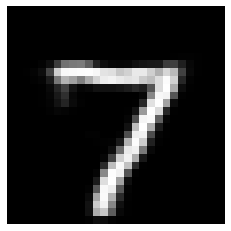

In [59]:
plt.imshow(results[0].reshape(28,28))
plt.axis('off')

In [74]:
# predict image outside the dataset
import cv2
image_path='/content/img3.jpg'
img=cv2.imread(image_path,0)
img=cv2.resize(img,(28,28))
noise_img = image.img_to_array(img)
noise_img = noise_img/255.
noise_img = np.array(noise_img.reshape(-1,28,28,1))

In [75]:
res_img=autoencoder.predict(noise_img)